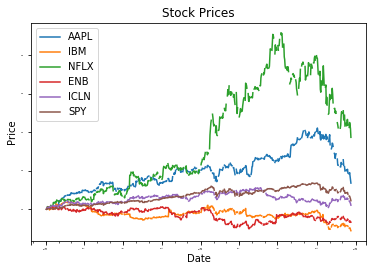

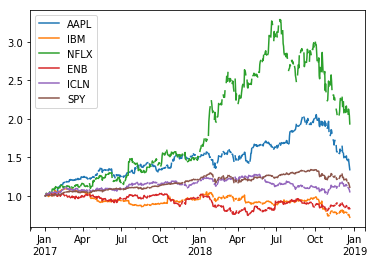

In [11]:
""" Current Functions:

1.) Read in data from folder (pass symbols to list)
2.) Normalize data in dataframe
3.) Slice and Plot Two Stocks (after they're normalized)

Upcoming Changes: 

1.) Change the source of the data to an API and 
create a new DataFrame from it
2.) Add HTML box for raw input of stock symbol
to search DataFrame
3.) Modify plot function as needed depending on the
changes made to the DataFrame

Exploratory Changes: 

1.) Bundle functions into a single class
"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'NFLX' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        '''Read and join data for each symbol''' 
        df_temp = pd.read_csv('Data/{}.csv'.format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], 
                na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close': symbol})
        df=df.join(df_temp)       

    return df 

def normalize_data(df):
    '''Normalizing Data Using the First Row of DF'''
    return df/ df.iloc[0,:]

def plot_data(df, title='Stock Prices'):
    """Plot Stock Prices"""
    ax = df.plot(title=title, fontsize=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    df.plot(kind='line')
    plt.show(ax)
def test_run():
    '''Define a date range'''
    dates = pd.date_range('2017-01-03', '2018-12-21')
    '''Choose stock symbols to read'''
    symbols = ['AAPL', 'IBM', 'NFLX', 'ENB','ICLN', 'SPY'] 
    # Get stock data
    df = get_data(symbols, dates)
    normalize_data(df)
    plot_norm = normalize_data(df)
    plot_data(plot_norm)
    


if __name__ == "__main__":
    test_run()
